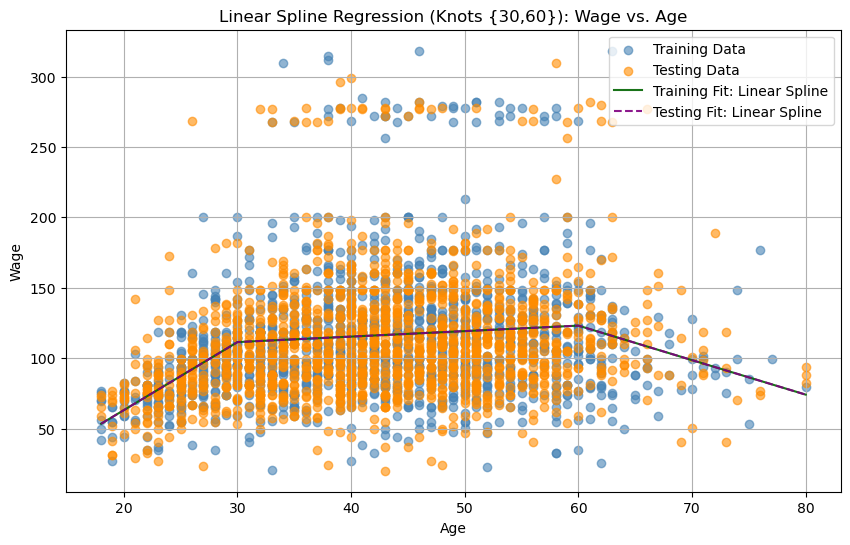

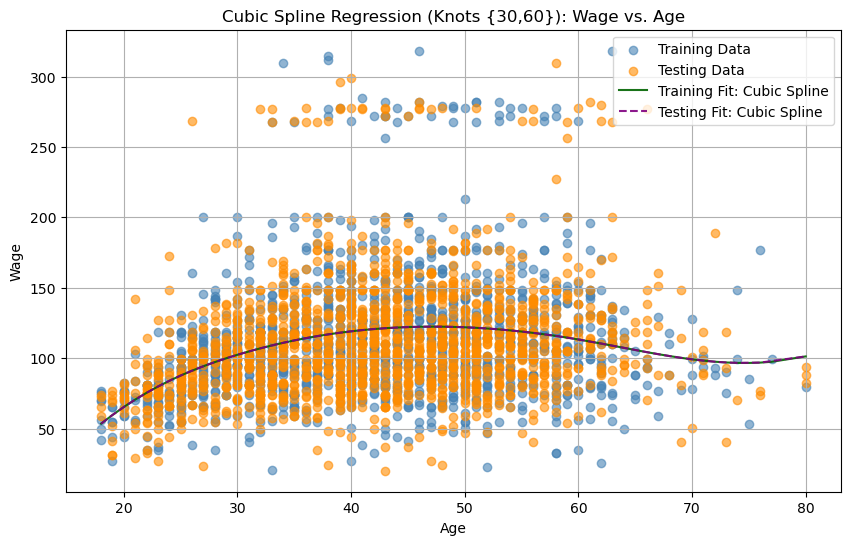

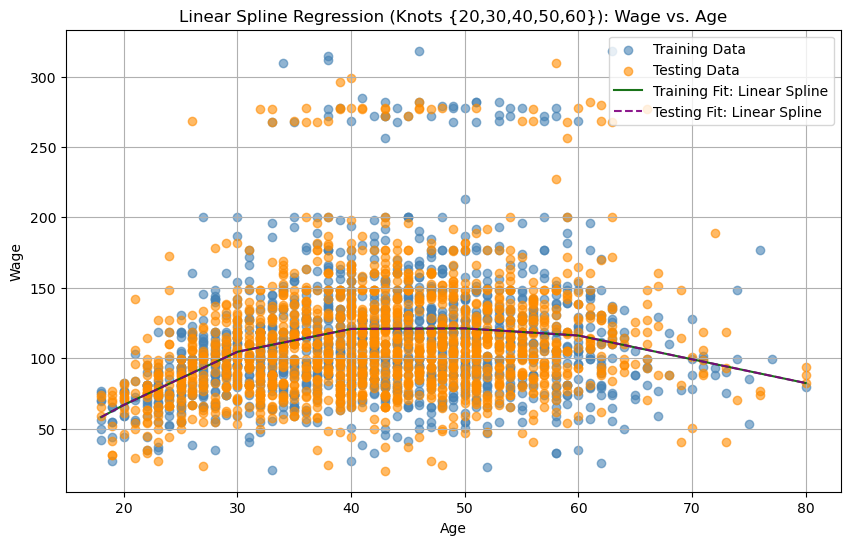

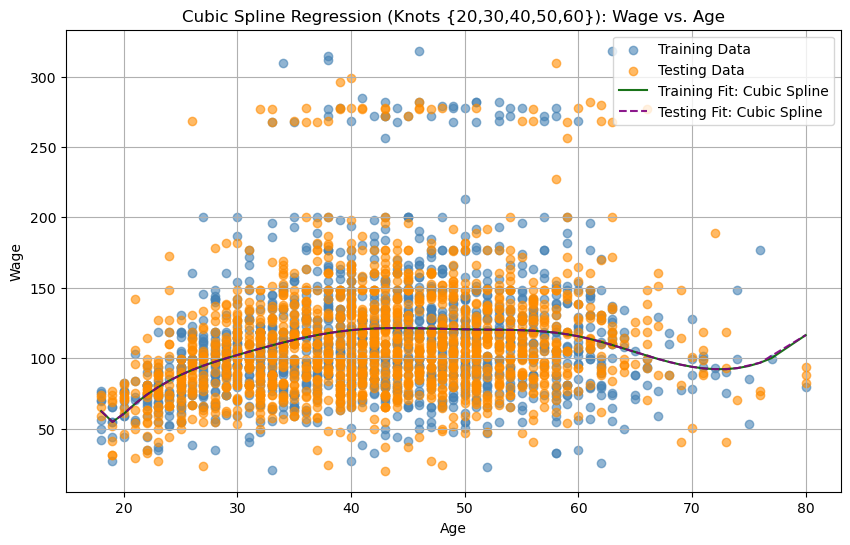

MSE for Linear Splines with Knots {30,60}:  1553.8066709872724
R² for Linear Splines with Knots {30,60}:  0.08497742397402008
MSE for Cubic Splines with Knots {30,60}:  1566.2653964432754
R² for Cubic Splines with Knots {30,60}:  0.09328312576502806
MSE for Linear Splines with Knots {20,30,40,50,60}:  1557.826524501068
R² for Linear Splines with Knots {20,30,40,50,60}:  0.09300875329648195
MSE for Cubic Splines with Knots {20,30,40,50,60}:  1563.1961723488737
R² for Cubic Splines with Knots {20,30,40,50,60}:  0.09444386820397632
The best model is Linear Spline {30,60} with an MSE of 1553.8066709872724 and R² of 0.08497742397402008


In [17]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Load the data
data = pd.read_csv('wages.csv')

# Function to create manual spline terms
def create_spline_terms(df, knots):
    for knot in knots:
        # Create linear, squared, and cubed spline terms for each knot
        df[f'age_{knot}'] = np.maximum(0, df['age'] - knot)
        df[f'age_{knot}_squared'] = df[f'age_{knot}'] ** 2
        df[f'age_{knot}_cubed'] = df[f'age_{knot}'] ** 3
    # Create overall squared and cubed terms for 'age'
    df['age_squared'] = df['age'] ** 2
    df['age_cubed'] = df['age'] ** 3
    return df

# Apply the function to create spline terms
knots_list = [30, 60, 20, 40, 50]
data = create_spline_terms(data, knots_list)

# Split data into two halves
n = len(data)
train_data = data[:n//2]
test_data = data[n//2:]

# Function to manually calculate MSE
def calculate_mse(actual, predicted):
    return np.mean((actual - predicted) ** 2)

# Function to plot and compute MSE & R² for a model
def fit_and_evaluate_spline(train_data, test_data, formula, knots_label, model_type):
    # Fit the model
    model = smf.ols(formula=formula, data=train_data).fit()

    # Predict on test data
    y_pred = model.predict(test_data)

    # Compute MSE manually
    mse = calculate_mse(test_data['wage'], y_pred)
    
    # Compute R²
    r2 = model.rsquared

    # Sort data by age to avoid plot line issues
    train_data_sorted = train_data.sort_values(by='age')
    test_data_sorted = test_data.sort_values(by='age')

    # Plot the results with updated titles and visual style
    plt.figure(figsize=(10, 6))
    plt.scatter(train_data_sorted['age'], train_data_sorted['wage'], color='steelblue', label='Training Data', alpha=0.6, zorder=0)
    plt.scatter(test_data_sorted['age'], test_data_sorted['wage'], color='darkorange', label='Testing Data', alpha=0.6, zorder=0)
    
    # Plot training fit
    plt.plot(train_data_sorted['age'], model.predict(train_data_sorted), color='darkgreen', alpha=0.9, label=f'Training Fit: {model_type}')
    # Plot testing fit
    plt.plot(test_data_sorted['age'], model.predict(test_data_sorted), color='purple', alpha=0.9, label=f'Testing Fit: {model_type}', linestyle='--')

    # Labels and title
    plt.xlabel('Age')
    plt.ylabel('Wage')
    plt.title(f'{model_type} Regression (Knots {knots_label}): Wage vs. Age')
    
    # Add grid and legend
    plt.grid(True)
    plt.legend()
    
    # Show plot
    plt.show()

    return mse, r2

# Define formulas for linear and cubic splines with knots {30,60}
linear_spline_formula_30_60 = 'wage ~ age + age_30 + age_60'
cubic_spline_formula_30_60 = 'wage ~ age + age_squared + age_cubed + age_30_cubed + age_60_cubed'

# Define formulas for linear and cubic splines with knots {20,30,40,50,60}
linear_spline_formula_multi = 'wage ~ age + age_20 + age_30 + age_40 + age_50 + age_60'
cubic_spline_formula_multi = 'wage ~ age + age_squared + age_cubed + age_20_cubed + age_30_cubed + age_40_cubed + age_50_cubed + age_60_cubed'

# Fit and evaluate models
mse_linear_30_60, r2_linear_30_60 = fit_and_evaluate_spline(train_data, test_data, linear_spline_formula_30_60, '{30,60}', 'Linear Spline')
mse_cubic_30_60, r2_cubic_30_60 = fit_and_evaluate_spline(train_data, test_data, cubic_spline_formula_30_60, '{30,60}', 'Cubic Spline')
mse_linear_multi, r2_linear_multi = fit_and_evaluate_spline(train_data, test_data, linear_spline_formula_multi, '{20,30,40,50,60}', 'Linear Spline')
mse_cubic_multi, r2_cubic_multi = fit_and_evaluate_spline(train_data, test_data, cubic_spline_formula_multi, '{20,30,40,50,60}', 'Cubic Spline')

# Print out the MSE and R² for each model
print("MSE for Linear Splines with Knots {30,60}: ", mse_linear_30_60)
print("R² for Linear Splines with Knots {30,60}: ", r2_linear_30_60)

print("MSE for Cubic Splines with Knots {30,60}: ", mse_cubic_30_60)
print("R² for Cubic Splines with Knots {30,60}: ", r2_cubic_30_60)

print("MSE for Linear Splines with Knots {20,30,40,50,60}: ", mse_linear_multi)
print("R² for Linear Splines with Knots {20,30,40,50,60}: ", r2_linear_multi)

print("MSE for Cubic Splines with Knots {20,30,40,50,60}: ", mse_cubic_multi)
print("R² for Cubic Splines with Knots {20,30,40,50,60}: ", r2_cubic_multi)

# Compare the models and decide which performed best
best_model = min([(mse_linear_30_60, r2_linear_30_60, 'Linear Spline {30,60}'),
                  (mse_cubic_30_60, r2_cubic_30_60, 'Cubic Spline {30,60}'),
                  (mse_linear_multi, r2_linear_multi, 'Linear Spline {20,30,40,50,60}'),
                  (mse_cubic_multi, r2_cubic_multi, 'Cubic Spline {20,30,40,50,60}')],
                 key=lambda x: x[0])

print(f'The best model is {best_model[2]} with an MSE of {best_model[0]} and R² of {best_model[1]}')

#The Linear Spline Regression with knots at {30, 60} performed the best because it strikes an effective balance between model simplicity and flexibility. 
#This model has fewer knots, which prevents it from overfitting to the noise in the training data. 
#The placement of knots at 30 and 60 likely captures key changes in the wage-age relationship (for example, career milestones around these ages), without introducing unnecessary complexity.
